In [1]:
#visualizing the image within the covnet layers
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io, color
import matplotlib.image as mpimg

Using TensorFlow backend.


In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def img_read(no_gray):
    img = mpimg.imread(r'C:\Users\user\Desktop\Abhilash\Imp\Deep_Learning\Neural Networks\CNN\Images and Networks\Visualizing Layers and Edges\Images\test3.jpg')     
    if no_gray==0:
        gray = rgb2gray(img)
    else:
        gray = img        
    if __name__=="__main__":
        plt.imshow(gray, cmap = plt.get_cmap('gray'))
        #plt.colorbar()
        #plt.show()
        plt.savefig('grayscale.pdf')
    
    return gray

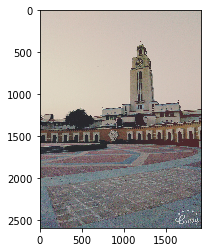

In [5]:
img = img_read(1)
s = img.shape# 2592,1920,3

In [6]:
#creating a single convolutional layer
inputs = Input(shape=s)
# a layer instance is callable on a tensor, and returns a tensor
x = Conv2D(3, kernel_size = (2,2), strides = (1,1))(inputs)
model = Model(inputs=inputs, outputs=x)

In [7]:
#prediction in keras require a set of images/more than 1 image
#solution - add a dimension to the image array
ximg = np.expand_dims(img,axis=0)

#Now we can do the prediction
convolved_img = model.predict(ximg)

In [9]:
def visualize(model,img):
    ximg = np.expand_dims(img,axis=0)
    convolved_img = model.predict(ximg)
    #visualizing what the convolutional layer sees
    c1_img = np.squeeze(convolved_img,axis=0)
    plt.imshow(c1_img)
    plt.axis('off')
    #plt.savefig('C1 output with 3 filters, relu and maxpool.pdf')

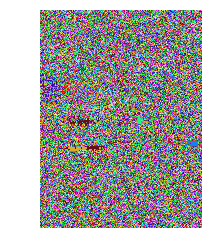

In [10]:
visualize(model,img)

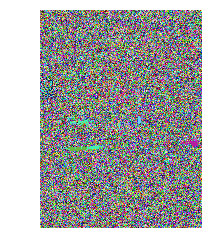

In [17]:
#increasing the kernel size to (3,3)
z = Conv2D(3, kernel_size = (3,3), strides = (1,1))(inputs)
modelz = Model(inputs=inputs, outputs=z)
visualize(modelz,img)

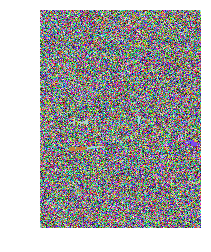

In [18]:
#details lost in increasing the kernel. Increase kernel to (5,5)
z = Conv2D(3, kernel_size = (5,5), strides = (1,1))(inputs)
modelz = Model(inputs=inputs, outputs=z)
visualize(modelz,img)

In [ ]:
#Further loss in details. All noisy now

In [12]:
#adding activation function 'relu' to the layer
x = Conv2D(3, kernel_size = (2,2), strides = (1,1), activation='relu')(inputs)
model1 = Model(inputs=inputs, outputs=x)

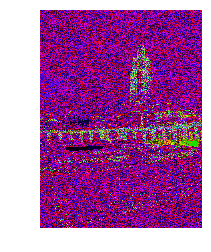

In [13]:
visualize(model1,img)

In [ ]:
#non-linearity brings out the edges

In [15]:
#adding a maxpooling layer
x = MaxPooling2D(pool_size = (2,2))(x)
model2 = Model(inputs = inputs, outputs = x)

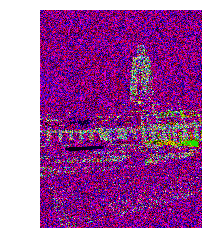

In [16]:
visualize(model2,img)

In [ ]:
#clarity increases further with pooling

In [ ]:
#how much can a single filter extract?
y = Conv2D(3, kernel_size = (2,2), strides = (1,1), activation='relu')(inputs)